In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [13]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df =df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [15]:
df['Age'].fillna(df['Age'].median(), inplace =True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2916\3437043010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace =True)


In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2916\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [17]:
le= LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [30]:
##logistic regression 
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)
y_pred_log=log_reg.predict(x_test)

In [31]:
print("Logitstic regression accuracy :", accuracy_score(y_test,y_pred_log))

Logitstic regression accuracy : 0.8100558659217877


In [24]:
## KNN 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print("KNN accuracy :", accuracy_score(y_test,y_pred_knn))

KNN accuracy : 0.7206703910614525


In [ ]:
## naive bayes 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print("Naive Bayes accuracy :", accuracy_score(y_test,y_pred_nb))

Naive Bayes accuracy : 0.776536312849162


In [ ]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7821229050279329


In [ ]:
## random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8212290502793296


In [28]:
##gradient boost classifier 
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

print("Gradient Boost Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boost Accuracy: 0.8100558659217877


In [29]:
## ada boost 
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)
y_pred_ab = ab.predict(x_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))


AdaBoost Accuracy: 0.7988826815642458


In [32]:
## xgboost classifier 
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7988826815642458


C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:07:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



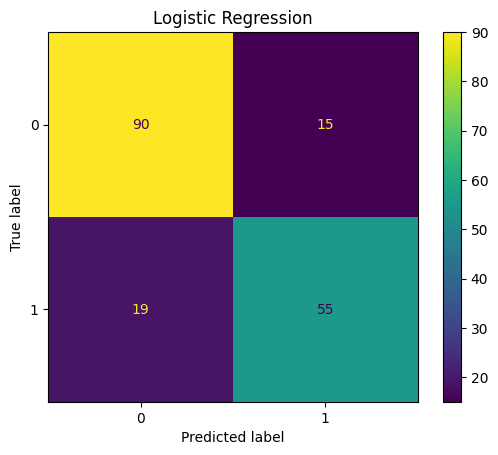


KNN
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.54      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



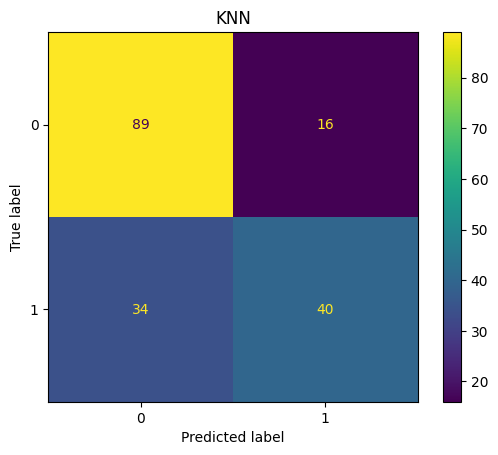


Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



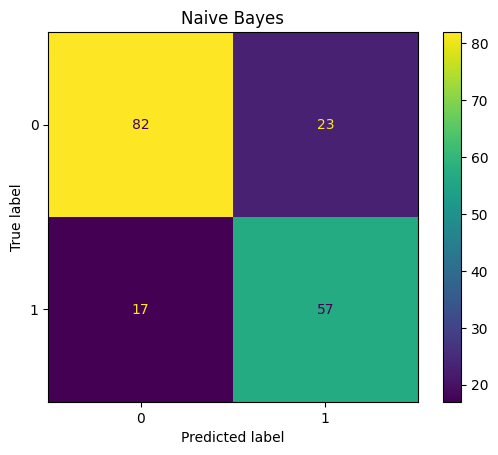


Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



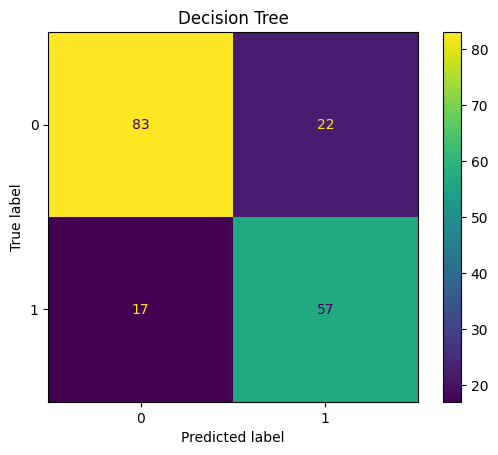


Random Forest
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



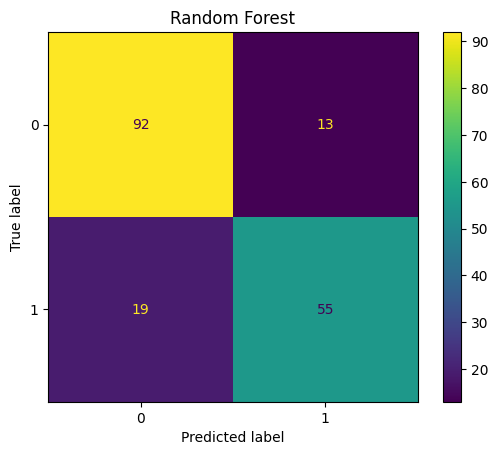


Gradient Boost
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



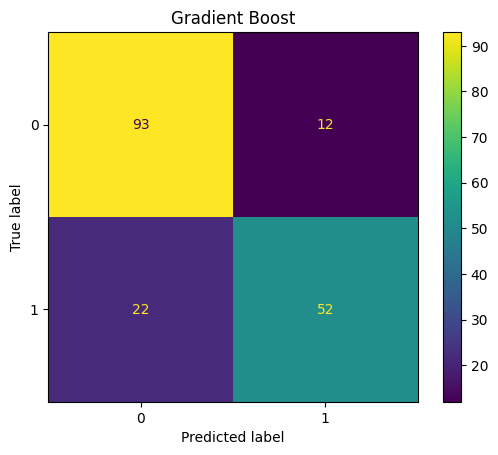


AdaBoost
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



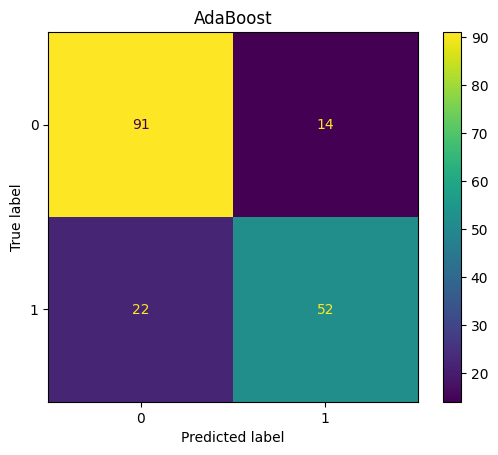


XGBoost
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



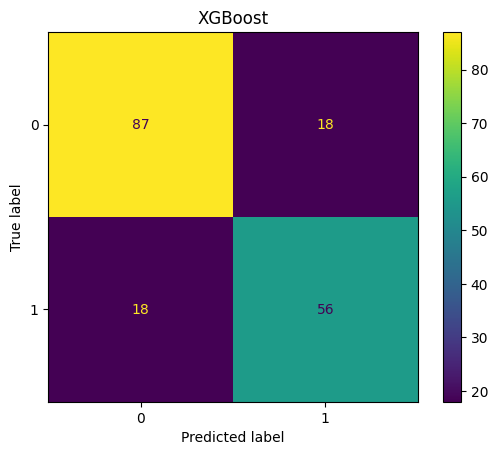

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": y_pred_log,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boost": y_pred_gb,
    "AdaBoost": y_pred_ab,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    print(f"\n{name}")
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot()
    plt.title(name)
    plt.show()


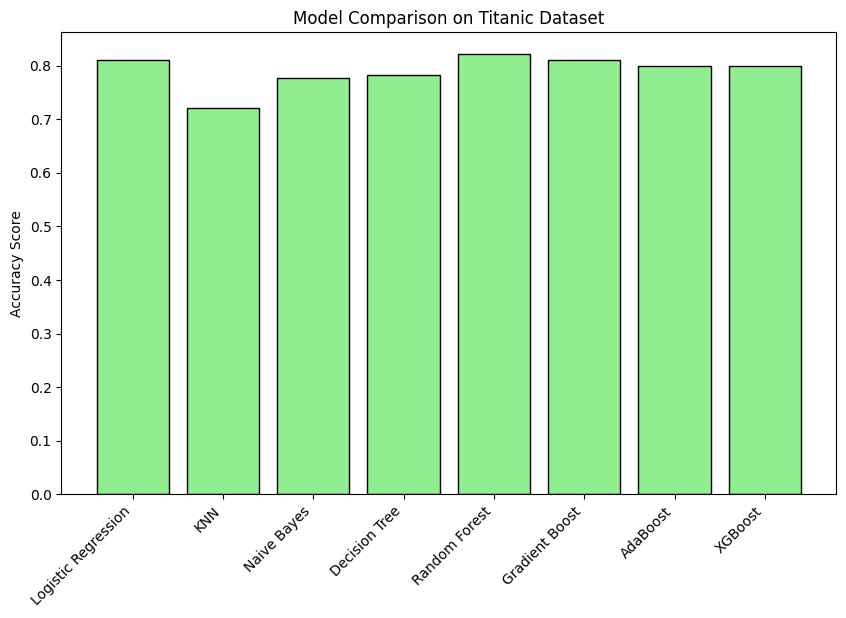

In [37]:
import matplotlib.pyplot as plt

# Store all accuracies
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boost": accuracy_score(y_test, y_pred_gb),
    "AdaBoost": accuracy_score(y_test, y_pred_ab),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='lightgreen', edgecolor='black')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison on Titanic Dataset")
plt.show()
